# Xband Bathy Analysis

#### Imports

In [2]:
import scipy.io as spio
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.patches as patches
import plotly.graph_objects as go
from collections import Counter
from collections import OrderedDict
import matplotlib.font_manager as font_manager
import netCDF4
import datetime
import time
import calendar
import sys
import pytz
import requests
import json
import pvlib
import scipy.stats as stats
from scipy.stats import chi2_contingency as chi

print('Import successful')

Import successful


#### Create Bathy File Directory List

In [3]:
bathyFiles = []

directory = '/Users/maili/Downloads/XbandProject/2022-2021_Xband_Data'
for root, dirs, files in os.walk(directory):
    for file in files:
        if file.endswith('.RIOS.Bathyproc.mat'):
            bathyFiles.append(os.path.join(root, file))

bathyFiles = sorted(bathyFiles)
print(bathyFiles)

['/Users/maili/Downloads/XbandProject/2022-2021_Xband_Data/20211213-1522.RIOS.Bathyproc.mat', '/Users/maili/Downloads/XbandProject/2022-2021_Xband_Data/20211213-1617.RIOS.Bathyproc.mat', '/Users/maili/Downloads/XbandProject/2022-2021_Xband_Data/20211213-1828.RIOS.Bathyproc.mat', '/Users/maili/Downloads/XbandProject/2022-2021_Xband_Data/20211213-2015.RIOS.Bathyproc.mat', '/Users/maili/Downloads/XbandProject/2022-2021_Xband_Data/20211214-0916.RIOS.Bathyproc.mat', '/Users/maili/Downloads/XbandProject/2022-2021_Xband_Data/20211214-1027.RIOS.Bathyproc.mat', '/Users/maili/Downloads/XbandProject/2022-2021_Xband_Data/20211214-1137.RIOS.Bathyproc.mat', '/Users/maili/Downloads/XbandProject/2022-2021_Xband_Data/20211214-1248.RIOS.Bathyproc.mat', '/Users/maili/Downloads/XbandProject/2022-2021_Xband_Data/20211216-0909.RIOS.Bathyproc.mat', '/Users/maili/Downloads/XbandProject/2022-2021_Xband_Data/20211216-1019.RIOS.Bathyproc.mat', '/Users/maili/Downloads/XbandProject/2022-2021_Xband_Data/20211216-11

#### Names Bathy Files Based on Date/Time and Creates Dictionary

In [4]:
bathyFilesDateAndTime = []

for i in bathyFiles:
    bathyFile = i
    bathyFile = str(bathyFile[57:70])
    bathyFilesDateAndTime.append(bathyFile)

print(bathyFilesDateAndTime)
bathyFilesKey = bathyFiles
bathyFilesValue = bathyFilesDateAndTime

bathyFilesDateAndTimeDict = dict(zip(bathyFilesKey, bathyFilesValue))
print(bathyFilesDateAndTimeDict)

['20211213-1522', '20211213-1617', '20211213-1828', '20211213-2015', '20211214-0916', '20211214-1027', '20211214-1137', '20211214-1248', '20211216-0909', '20211216-1019', '20211216-1152', '20211216-1302', '20211216-1412', '20211216-1523', '20211216-1633', '20211216-1744', '20211216-1854', '20211216-2004', '20211216-2115', '20211216-2225', '20211216-2336', '20211217-0046', '20211217-0156', '20211217-0307', '20211217-0417', '20211217-0527', '20211217-0638', '20211217-0748', '20211217-0859', '20211217-1009', '20211217-1119', '20211217-1230', '20211217-1340', '20211217-1451', '20211217-1601', '20211217-1711', '20211217-1822', '20211217-1932', '20211217-2042', '20211217-2153', '20211217-2304', '20211220-1142', '20211220-1241', '20211220-1351', '20211220-1502', '20211220-1612', '20211220-1722', '20211220-1833', '20211220-1943', '20211220-2054', '20211220-2204', '20211220-2314', '20211221-0025', '20211221-0135', '20211221-0245', '20211221-0356', '20211221-0506', '20211221-0617', '20211221-072

#### Convert .mat Data Into Python Arrays

In [5]:
beachStart = []
eastingCenter = []
iGrid = []
iGridMean = []
meanWaveAngle = []
northingCenter = []
pktpFilt = []
swashStart = []
swashStop = []
tpCollect = []
tpMean = []
xGrid = []
xshoreStart = []
xshoreStop = []
yGrid = []
depthMean = []
depthSmooth = []
depthSmoothR = []
f = []
profX = []

for i in bathyFiles:
    currentFile = spio.loadmat(i)
    # beachStart.append(currentFile['Beach_start'])
    eastingCenter.append(currentFile['EastingCenter'])
    # iGrid.append(currentFile['IGrid'])
    # iGridMean.append(currentFile['IGridMean'])
    # meanWaveAngle.append(currentFile['MeanWaveAngle_geo'])
    northingCenter.append(currentFile['NorthingCenter'])
    # pktpFilt.append(currentFile['PkTp_filt'])
    # swashStart.append(currentFile['Swash_start'])
    # swashStop.append(currentFile['Swash_stop'])
    # tpCollect.append(currentFile['Tp_collect'])
    # tpMean.append(currentFile['Tp_mean'])
    xGrid.append(currentFile['XGrid'])
    # xshoreStart.append(currentFile['Xshore_start'])
    # xshoreStop.append(currentFile['Xshore_stop'])
    yGrid.append(currentFile['YGrid'])
    depthMean.append(currentFile['depthMean'])
    depthSmooth.append(currentFile['depthSmooth'])
    # depthSmoothR.append(currentFile['depthSmooth_R'])
    # f.append(currentFile['f'])
    # profX.append(currentFile['prof_x'])


#### Calculates Number of Nan Values Per Grid

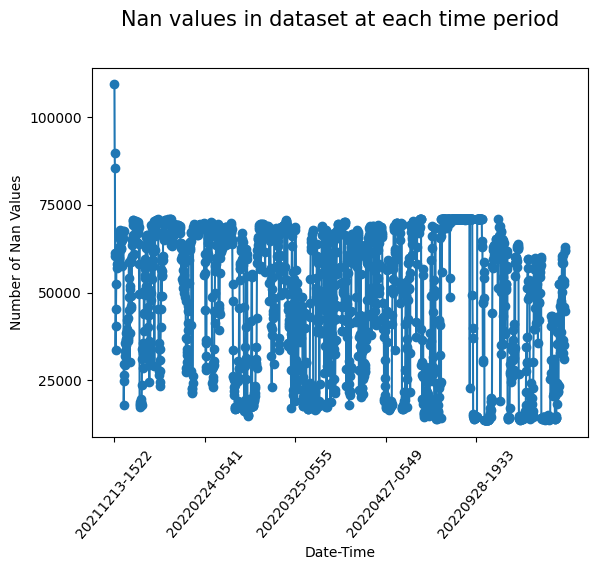

In [6]:
depthSmoothNanKeyArray = []
depthSmoothNanValueArray = []

key = 1
for i in depthSmooth:
    depthSmoothNanKeyArray.append(key)
    depthSmoothNanValueArray.append(np.count_nonzero(np.isnan(i)))
    key += 1

depthSmoothNanCountDict = dict(zip(depthSmoothNanKeyArray, depthSmoothNanValueArray))

plt.scatter(depthSmoothNanKeyArray, depthSmoothNanValueArray)
plt.title('Nan values in dataset at each time period', fontsize = 15, pad = 30)
plt.xlabel('Date-Time')
plt.ylabel('Number of Nan Values')
x = depthSmoothNanKeyArray
y = depthSmoothNanValueArray
my_xticks = bathyFilesDateAndTime
plt.xticks(x, my_xticks)
plt.plot(x, y)
plt.locator_params(axis = 'both', nbins = 5)
plt.tick_params(axis = 'x', rotation = 50)
plt.show()

#### Station Number and Import Libraries

In [7]:
stn = '243'
startdate = '12/13/2021'
enddate = '12/17/2022'

station = 'https://thredds.cdip.ucsd.edu/thredds/dodsC/cdip/archive/243p1/243p1_historic.nc?waveHs[0:1:82385],waveTa[0:1:82385],sstTime[0:1:82387]'

stationNC = netCDF4.Dataset(station)
print(stationNC.variables.keys())

waveHs = stationNC.variables['waveHs']
waveHs = waveHs[:]

waveTa = stationNC.variables['waveTa']
waveTa = waveTa[:]

sstTime = stationNC.variables['sstTime']
sstTime = sstTime[:]

data = [waveHs, waveTa]
names = ['Significant wave height', 'Average wave period']

dict_keys(['waveHs', 'waveTa', 'sstTime'])


#### Comparing CDIP Data with XBand Data

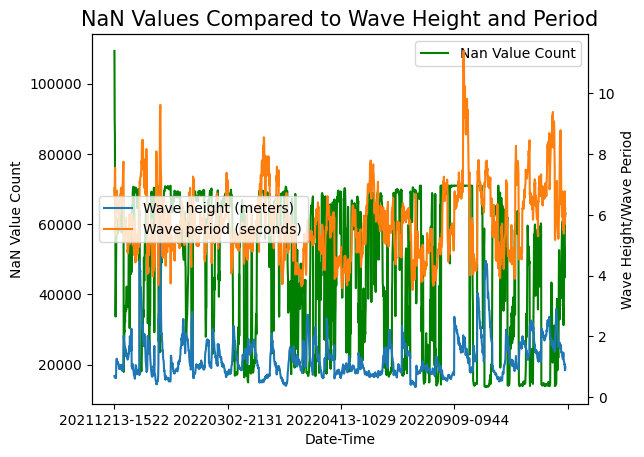

In [8]:
unixTimestamp = []
for i in bathyFilesDateAndTime:
    date_obj = datetime.datetime.strptime(i, '%Y%m%d-%H%M')
    timezone = pytz.timezone('America/New_York')
    local_date = timezone.localize(date_obj)
    utc_date = local_date.astimezone(pytz.utc)
    unixTimestamp.append(utc_date.timestamp())

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

cdipClosestTimes = []
for i in unixTimestamp:
    nearestTime = find_nearest(sstTime, i)
    cdipClosestTimes.append(nearestTime)

cdipClosestTimesIndex = []
sstTimeList = list(sstTime)
for i in cdipClosestTimes:
    x = sstTimeList.index(i)
    cdipClosestTimesIndex.append(x)


waveHsClosestTimes = []
waveTaClosestTimes = []
for i in cdipClosestTimesIndex:
    waveHsClosestTimes.append(waveHs[i])
    waveTaClosestTimes.append(waveTa[i])

fig, ax = plt.subplots()

ax.plot(bathyFilesDateAndTime, depthSmoothNanValueArray, color = 'green', label = 'Nan Value Count')
ax.set_xlabel('Date-Time')
ax.set_ylabel('NaN Value Count')
plt.legend()
ax.xaxis.set_major_locator(plt.MaxNLocator(5))

ax2 = ax.twinx()
ax2.plot(bathyFilesDateAndTime, waveHsClosestTimes, label = 'Wave height (meters)')
ax2.set_ylabel('Wave Height/Wave Period')
ax2.plot(bathyFilesDateAndTime, waveTaClosestTimes, label = 'Wave period (seconds)')
plt.legend(loc = 'center left')
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
plt.title('NaN Values Compared to Wave Height and Period', fontsize = 15)
plt.show()


#### Filter XBand Data by Wave Height

In [9]:
significantTimesIndex = []
significantHeightsIndex = []
significantPeriodsIndex = []

def find_indices(list_to_check, item_to_find):
    indices = []
    for idx, value in enumerate(list_to_check):
        if value == item_to_find:
            indices.append(idx)
    return indices


w = 0
for i in waveHsClosestTimes:
    if i > 1.5:
        significantTimesIndex.append(find_indices(waveHsClosestTimes, i))
        significantHeightsIndex.append(i * 0.3048)
        significantPeriodsIndex.append(waveTaClosestTimes[w])
    w += 1


significantTimesIndex = np.concatenate(significantTimesIndex, axis = 0)
significantTimesIndex = significantTimesIndex.tolist()
significantTimesIndex = list(OrderedDict.fromkeys(significantTimesIndex))
significantTimesIndex.sort()

significantDatasets = []
for i in significantTimesIndex:
    significantDatasets.append(depthSmooth[i])

significantTimes = []
for i in significantTimesIndex:
    significantTimes.append(bathyFilesDateAndTime[i])

print(significantTimes)

print(len(significantTimesIndex))
print(len(significantHeightsIndex))
print(len(significantTimes))

['20211220-1142', '20211220-1241', '20211220-1351', '20211220-1502', '20211220-1612', '20211220-1722', '20211220-1833', '20211220-1943', '20211220-2054', '20211220-2314', '20211221-2004', '20211221-2215', '20211222-0025', '20211222-0235', '20211222-0446', '20211222-0656', '20211222-0907', '20211222-1117', '20211222-1327', '20211222-1959', '20211222-2209', '20211223-0654', '20220103-1411', '20220103-1622', '20220103-1833', '20220103-2044', '20220103-2254', '20220104-0105', '20220104-0316', '20220104-0526', '20220104-0737', '20220104-0948', '20220104-1158', '20220104-1409', '20220104-1620', '20220104-1830', '20220104-2041', '20220104-2252', '20220105-0102', '20220105-0524', '20220105-0734', '20220105-0945', '20220105-1156', '20220105-1406', '20220105-1828', '20220105-2038', '20220105-2249', '20220106-0100', '20220107-0520', '20220107-1012', '20220107-1223', '20220107-1644', '20220107-2106', '20220108-0127', '20220108-0338', '20220108-0759', '20220108-1010', '20220110-0543', '20220114-114

#### Create Heatmap of Bathymetry

In [10]:
n = 0

xDistanceUTM = xGrid[0]
yDistanceUTM = yGrid[0]

radarXUTM = np.median(xDistanceUTM)
radarYUTM = np.median(yDistanceUTM)

xDistance = xDistanceUTM - radarXUTM
yDistance = yDistanceUTM - radarYUTM

xDistance = xDistance[0, :]
yDistance = yDistance[:, 0]

#xDistance = xDistance[*set(xDistance)]
#yDistance = yDistance[*set(yDistance)]

xDistance.sort()
yDistance.sort()

# n = 0

# for i in significantDatasets:
#     dataset = i
#     plt.title(bathyFilesDateAndTime[significantTimesIndex[n]], fontsize = 15, pad = 30)
#     cmapColorScheme = sns.dark_palette('#5CA892', as_cmap=True)
#     ax = sns.heatmap(dataset, square = 'True', xticklabels = xDistance, yticklabels = yDistance, cmap = cmapColorScheme)
#     plt.locator_params(axis = 'x', nbins = 11)
#     plt.locator_params(axis = 'y', nbins = 16)
#     ax.collections[0].colorbar.set_label('Meters Deep')
#     ax.add_patch(patches.Rectangle((57, 146), 20, 63, fill = False, angle = 295))
#     plt.xlabel('Horizontal Meters from Radar')
#     plt.ylabel('Vertical Meters from Radar')
#     plt.savefig('/Users/maili/Downloads/XbandProject/2022-2021_Xband_Heatmaps' + bathyFilesDateAndTime[significantTimesIndex[n]] + '.png', bbox_inches = 'tight')
#     plt.show()
#     n += 1


#### Calculates Number of Total Points, Points Per Grid, Points Per Row/Column

In [11]:
cols = len(depthSmooth[0][0])
rows = len(depthSmooth[0])

print('Rows, Columns')
print(cols, rows)

pointsPerGrid = rows * cols
print('Points per grid: ', pointsPerGrid)

totalPoints = pointsPerGrid * len(depthSmooth)
print('Total number of points: ', totalPoints)
metersSquaredPerPoint = (1650 * 1725) / pointsPerGrid
print('Square space of a point: ', metersSquaredPerPoint)

Rows, Columns
361 361
Points per grid:  130321
Total number of points:  259469111
Square space of a point:  21.840302023465135


#### Change in Depth Heatmaps

In [12]:
numberSignificantDepthSmoothValues = len(significantTimesIndex)
depthChangeDatasets = []

def subtract_arrays(array1, array2):
    # Check if the arrays have the same shape
    if len(array1) != len(array2) or len(array1[0]) != len(array2[0]):
        raise ValueError("Arrays must have the same shape")

    # Create an empty result array with the same shape as input arrays
    result_array = [[0] * len(array1[0]) for _ in range(len(array1))]

    # Calculate the differences between corresponding elements
    for i in range(len(array1)):
        for j in range(len(array1[0])):
            result_array[i][j] = array1[i][j] - array2[i][j]

    return result_array

i = 1
while i < numberSignificantDepthSmoothValues:
    diffArray = subtract_arrays(significantDatasets[i], significantDatasets[i - 1])
    i += 1
    depthChangeDatasets.append(diffArray)
    
    # cmapColorScheme = sns.diverging_palette(162.63, 37.5, center='light', as_cmap=True)
    # ax = sns.heatmap(diffArray, center = 0, xticklabels = xDistance, yticklabels = yDistance, cmap=cmapColorScheme)
    # plt.locator_params(axis = 'x', nbins = 11)
    # plt.locator_params(axis = 'y', nbins = 16)
    # ax.collections[0].colorbar.set_label('Meters (difference)')
    # ax.add_patch(patches.Rectangle((57, 146), 20, 63, fill = False, angle = 295))
    # ax.set_xlabel('Horizontal Meters from Radar')
    # ax.set_ylabel('Vertical Meters from Radar')
    # plt.title('Depth Change' + '_' + bathyFilesDateAndTime[significantTimesIndex[i - 1]])
    # plt.savefig('/Users/maili/Downloads/XbandProject/2022-2021_Xband_Delta_Heatmaps' + bathyFilesDateAndTime[significantTimesIndex[i - 1]] + '.png', bbox_inches = 'tight')
    # plt.show()

#### Volume Moved Sand Calculation

In [13]:
depthChangeDatasetsPositive = []
totalSandMoved = []

for i in depthChangeDatasets:
    changeWorkingDatasetPositive = []
    workingDataset = np.array(i)[np.logical_not(np.isnan(i))].tolist()
    workingTotalSandMoved = 0

    for w in workingDataset:
        if w < 0:
            changeWorkingDatasetPositive.append(abs(w) * metersSquaredPerPoint)
            workingTotalSandMoved += (abs(w) * metersSquaredPerPoint)
        else:
            workingTotalSandMoved += (w * metersSquaredPerPoint)
            changeWorkingDatasetPositive.append(w * metersSquaredPerPoint)
    if len(workingDataset) < totalPoints:
        workingTotalSandMoved += 0

    if np.isnan(workingTotalSandMoved) == True:
        workingTotalSandMoved = 0
    totalSandMoved.append(workingTotalSandMoved)


#### Filter Values

In [14]:
print(totalSandMoved)
print(len(totalSandMoved))
print(len(significantPeriodsIndex))
print(len(significantHeightsIndex))

[821566.9327782592, 406167.59950581874, 498426.46165619965, 484595.0882826484, 569323.4339670464, 854782.1728643134, 978326.4986583341, 703210.3886166621, 905144.2218061805, 502105.2651511547, 144156.1895656689, 673458.3090072714, 1270672.2077945145, 396330.0166644276, 847558.1011523217, 406869.59257882443, 454478.9865267128, 524651.8938472287, 309916.36937995825, 92779.4332412904, 163453.67532073046, 1785636.4708022221, 619706.2500930742, 1631979.7195468554, 723768.3873321064, 396985.03479305306, 469978.6802255875, 361177.88693130476, 360647.6923944399, 589291.0168783977, 534533.5415738315, 753125.55011904, 625099.1529363977, 603342.5096946717, 491282.3399849997, 676012.151955221, 564668.3012619645, 1423380.1125270948, 1253422.142468593, 417069.26158360677, 315599.2044829086, 257998.35868562796, 1228817.701765885, 624351.5519265969, 255514.25507214153, 101889.41704298116, 184477.01641266904, 518991.9831412209, 1025482.2721835979, 531535.6925191976, 508570.51692737784, 512367.685345468

In [15]:
from scipy.stats import zscore

x_dataTimes = np.asarray(significantTimes)
x_dataPeriod = np.asarray(significantPeriodsIndex, dtype=float)
x_dataHeight = np.asarray(significantHeightsIndex, dtype=float)
y_data = np.asarray(totalSandMoved, dtype=float)

def remove_zeroes_and_nans(x, y, threshold=3):
    print("Original length:", len(x))
    
    zero_y_indices = np.flatnonzero(y == 0)
    nan_y_indices = np.isnan(y)
    
    print("Length of zero_y_indices:", len(zero_y_indices))
    print("Length of nan_y_indices:", len(nan_y_indices))

    outliers = np.abs(zscore(y)) > threshold
    print("Length of outliers:", len(outliers))
    
    # Use np.union1d to find unique indices to remove
    invalid_indices = np.union1d(np.union1d(zero_y_indices, nan_y_indices), np.flatnonzero(outliers))
    
    print("Number of indices to remove:", len(invalid_indices))
    
    x_filtered = x[~invalid_indices]
    y_filtered = y[~invalid_indices]

    print("Filtered length:", len(x_filtered))

    return x_filtered, y_filtered


usableSignificantTimes, usableTotalSandMoved = remove_zeroes_and_nans(x_dataTimes, y_data)
usableWavePeriod, usableTotalSandMoved = remove_zeroes_and_nans(x_dataPeriod, y_data)
usableWaveHeight, usableTotalSandMoved = remove_zeroes_and_nans(x_dataHeight, y_data)


Original length: 588
Length of zero_y_indices: 73
Length of nan_y_indices: 587
Length of outliers: 587
Number of indices to remove: 83
Filtered length: 83
Original length: 588
Length of zero_y_indices: 73
Length of nan_y_indices: 587
Length of outliers: 587
Number of indices to remove: 83
Filtered length: 83
Original length: 588
Length of zero_y_indices: 73
Length of nan_y_indices: 587
Length of outliers: 587
Number of indices to remove: 83
Filtered length: 83


#### Wave Energy Calculation

In [16]:
waveEnergy = []
i = 1

while i < len(usableSignificantTimes):
    workingWaveEnergy = (1/8) * (1025) * (9.81) * (usableWaveHeight[i]**2) * usableWavePeriod[i]
    waveEnergy.append(workingWaveEnergy)
    i += 1

print(waveEnergy)

[5395.1887862353, 5324.401630113482, 6219.387675622452, 2530.1103189324626, 9419.20967917974, 3779.9622836684175, 2163.8291247589827, 1878.3984426769368, 1648.2838868159079, 1705.928068639337, 1819.388100878462, 2237.039685292569, 4194.713388635646, 3839.5464074890474, 3614.401936554288, 4666.447494561525, 2317.6177647775476, 1825.9234860059805, 1669.032387153459, 1887.802488276126, 1989.0856929409579, 1861.4588274800724, 1798.4303756925544, 2912.94409195946, 2372.860008308311, 3122.1801792775586, 3582.826686123083, 3580.7845031199763, 2677.6741301417633, 2339.5699554919165, 2492.6144919532985, 1905.6183556535134, 1864.2916692513945, 1965.134333102013, 2127.3702773845084, 2159.5900516033444, 1665.5687386496472, 1420.3826933688392, 1742.4443761864213, 2019.117952756484, 2388.4888710759947, 2929.3476248814695, 3562.1648323519194, 4311.220043882999, 3858.9688018832503, 4998.26902453397, 3638.6465664024186, 4005.220152988508, 4615.438623601318, 3833.9909041159085, 2617.696432385095, 1413.5

#### Boxplots for Variables

83


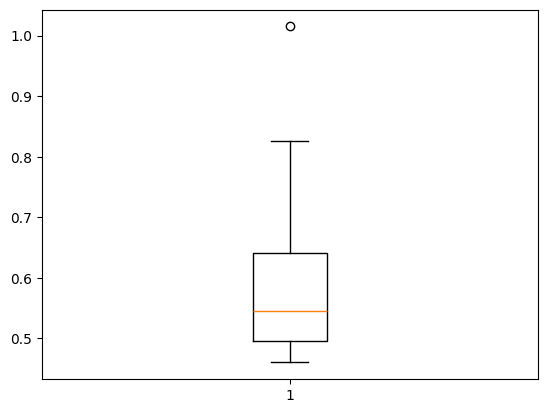

83
[0.4953     0.54559199 0.64160401]


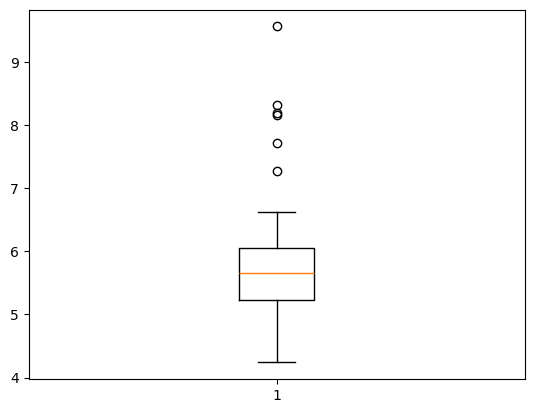

83
[5.23531985 5.64846992 6.04863667]


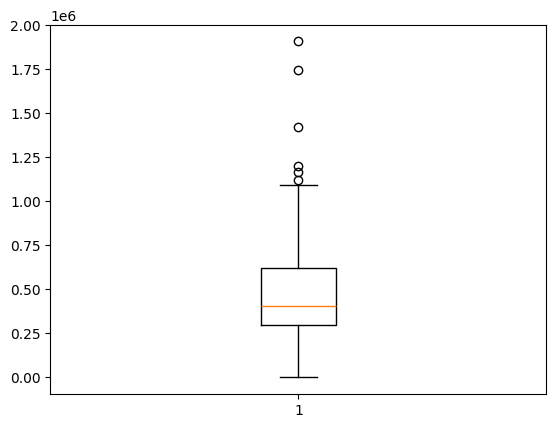

83
[298969.67755952 406126.80570515 623197.05342033]


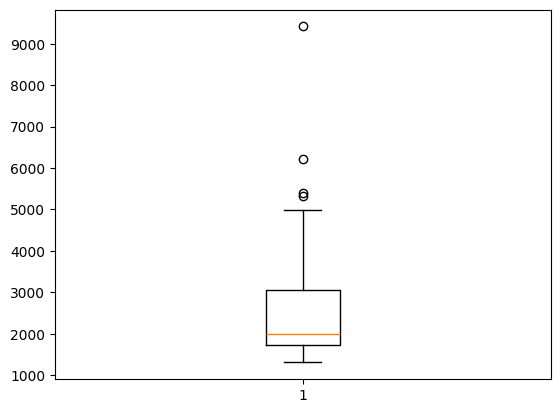

82
[1715.05714553 2004.10182285 3062.05872476]


In [17]:
print(len(usableSignificantTimes))
waveHeightBoxplot = plt.boxplot(usableWaveHeight)
plt.show()
print(len(usableWaveHeight))
print(np.quantile(usableWaveHeight, [0.25, 0.5, 0.75]))
wavePeriodBoxplot = plt.boxplot(usableWavePeriod)
plt.show()
print(len(usableWavePeriod))
print(np.quantile(usableWavePeriod, [0.25, 0.5, 0.75]))
sandMovedBoxplot = plt.boxplot(usableTotalSandMoved)
plt.show()
print(len(usableTotalSandMoved))
print(np.quantile(usableTotalSandMoved, [0.25, 0.5, 0.75]))
waveEnergyBoxplot = plt.boxplot(waveEnergy)
plt.show()
print(len(waveEnergy))
print(np.quantile(waveEnergy, [0.25, 0.5, 0.75]))


#### Analyze Percent Change Metrics

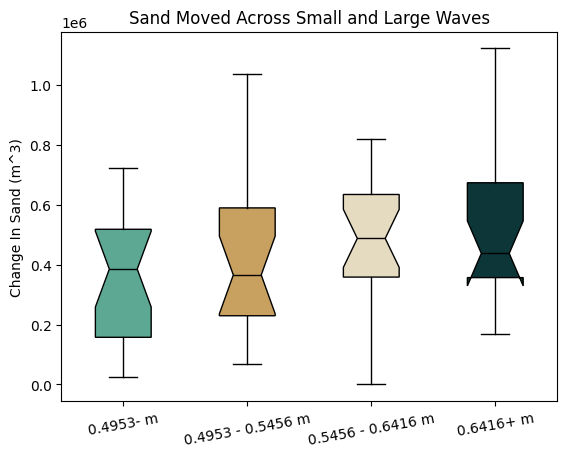

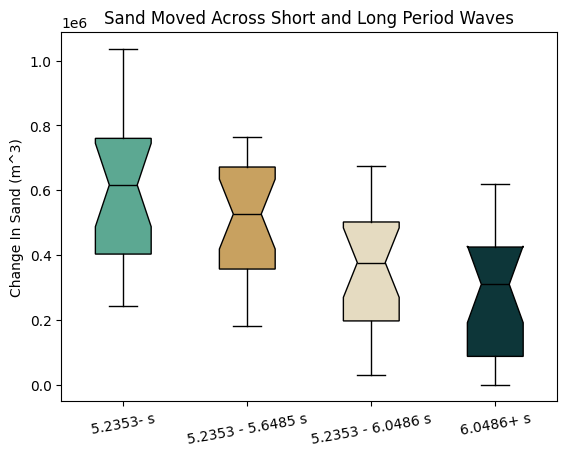

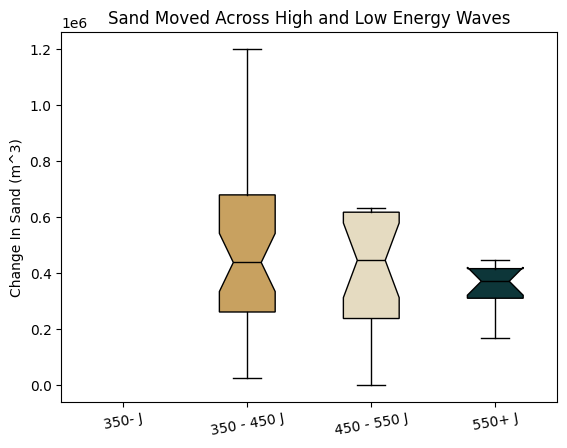

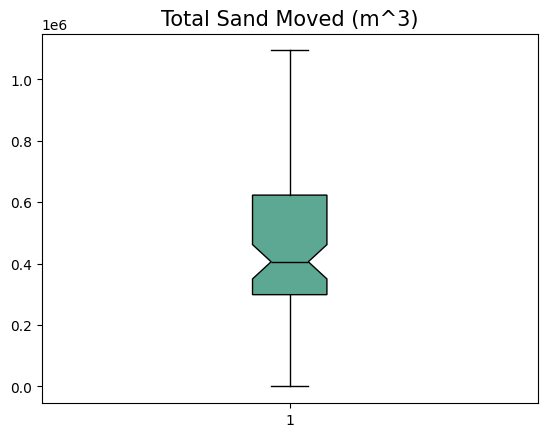

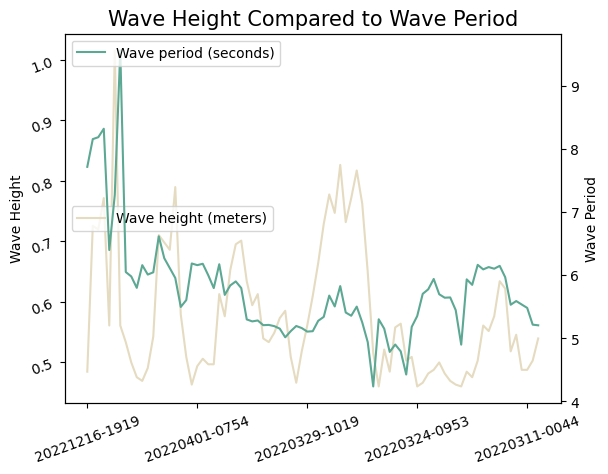

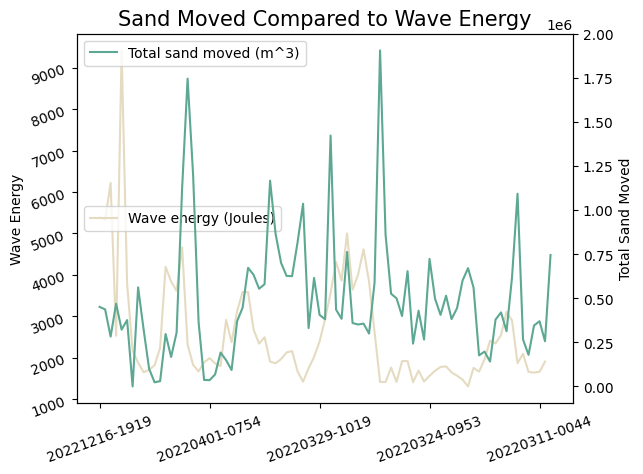

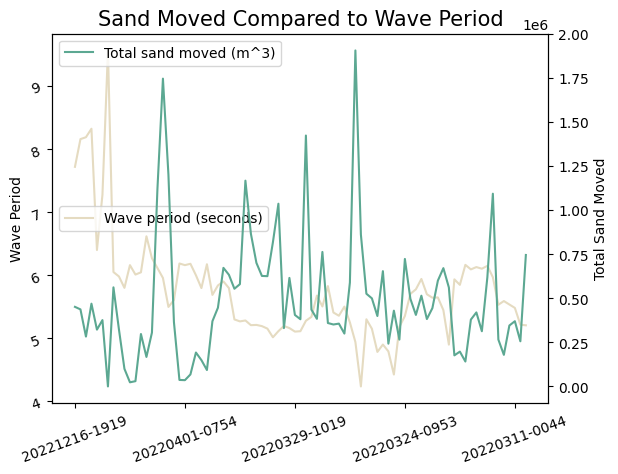

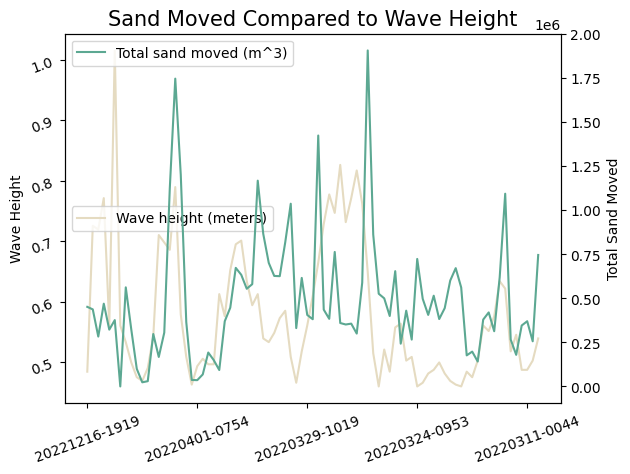

In [37]:
levelOneWaveHeightTimesTotalSandMoved = []
levelTwoWaveHeightTimesTotalSandMoved = []
levelThreeWaveHeightTimesTotalSandMoved = []
levelFourWaveHeightTimesTotalSandMoved = []
levelFiveWaveHeightTimesTotalSandMoved = []

levelOneWavePeriodTimesTotalSandMoved = []
levelTwoWavePeriodTimesTotalSandMoved = []
levelThreeWavePeriodTimesTotalSandMoved = []
levelFourWavePeriodTimesTotalSandMoved = []
levelFiveWavePeriodTimesTotalSandMoved = []

levelOneWaveEnergyTimesTotalSandMoved = []
levelTwoWaveEnergyTimesTotalSandMoved = []
levelThreeWaveEnergyTimesTotalSandMoved = []
levelFourWaveEnergyTimesTotalSandMoved = []
levelFiveWaveEnergyTimesTotalSandMoved = []

i = 1
while i < (len(waveEnergy) - 1):
    if usableWaveHeight[i] <= 0.4953:
        levelOneWaveHeightTimesTotalSandMoved.append(usableTotalSandMoved[i])
    elif usableWaveHeight[i] > 0.4953 and usableWaveHeight[i] <= 0.5456:
        levelTwoWaveHeightTimesTotalSandMoved.append(usableTotalSandMoved[i])
    elif usableWaveHeight[i] > 0.5456 and usableWaveHeight[i] <= 0.6416:
        levelThreeWaveHeightTimesTotalSandMoved.append(usableTotalSandMoved[i])
    elif usableWaveHeight[i] > 0.6416:
        levelFourWaveHeightTimesTotalSandMoved.append(usableTotalSandMoved[i])

    if usableWavePeriod[i] <= 5.2353:
        levelOneWavePeriodTimesTotalSandMoved.append(usableTotalSandMoved[i])
    elif usableWavePeriod[i] > 5.2353 and usableWavePeriod[i] <= 5.6485:
        levelTwoWavePeriodTimesTotalSandMoved.append(usableTotalSandMoved[i])
    elif usableWavePeriod[i] > 5.6485 and usableWavePeriod[i] <= 6.0486:
        levelThreeWavePeriodTimesTotalSandMoved.append(usableTotalSandMoved[i])
    elif usableWavePeriod[i] > 6.0486:
        levelFourWavePeriodTimesTotalSandMoved.append(usableTotalSandMoved[i])

    if waveEnergy[i] <= 1000:
        levelOneWaveEnergyTimesTotalSandMoved.append(usableTotalSandMoved[i])
    elif waveEnergy[i] > 1000 and waveEnergy[i] <= 2000:
        levelTwoWaveEnergyTimesTotalSandMoved.append(usableTotalSandMoved[i])
    elif waveEnergy[i] > 2000 and waveEnergy[i] <= 3000:
        levelThreeWaveEnergyTimesTotalSandMoved.append(usableTotalSandMoved[i])
    elif waveEnergy[i] > 3000 and waveEnergy[i] <= 4000:
        levelFourWaveEnergyTimesTotalSandMoved.append(usableTotalSandMoved[i])
    elif waveEnergy[i] > 4000:
        levelFiveWaveEnergyTimesTotalSandMoved.append(usableTotalSandMoved[i])
    
    i += 1

levelOneHeightData = np.array(levelOneWaveHeightTimesTotalSandMoved)
levelTwoHeightData = np.array(levelTwoWaveHeightTimesTotalSandMoved)
levelThreeHeightData = np.array(levelThreeWaveHeightTimesTotalSandMoved)
levelFourHeightData = np.array(levelFourWaveHeightTimesTotalSandMoved)
levelFiveHeightData = np.array(levelFiveWaveHeightTimesTotalSandMoved)

levelOnePeriodData = np.array(levelOneWavePeriodTimesTotalSandMoved)
levelTwoPeriodData = np.array(levelTwoWavePeriodTimesTotalSandMoved)
levelThreePeriodData = np.array(levelThreeWavePeriodTimesTotalSandMoved)
levelFourPeriodData = np.array(levelFourWavePeriodTimesTotalSandMoved)
levelFivePeriodData = np.array(levelFiveWavePeriodTimesTotalSandMoved)

levelOneEnergyData = np.array(levelOneWaveEnergyTimesTotalSandMoved)
levelTwoEnergyData = np.array(levelTwoWaveEnergyTimesTotalSandMoved)
levelThreeEnergyData = np.array(levelThreeWaveEnergyTimesTotalSandMoved)
levelFourEnergyData = np.array(levelFourWaveEnergyTimesTotalSandMoved)

totalSandMovedHeightData = [levelOneHeightData, levelTwoHeightData, levelThreeHeightData, levelFourHeightData]
totalSandMovedPeriodData = [levelOnePeriodData, levelTwoPeriodData, levelThreePeriodData, levelFourPeriodData]
totalSandMovedEnergyData = [levelOneEnergyData, levelTwoEnergyData, levelThreeEnergyData, levelFourEnergyData]

labelsHeight = ['0.4953- m', '0.4953 - 0.5456 m', '0.5456 - 0.6416 m', '0.6416+ m']
labelsPeriod = ['5.2353- s', '5.2353 - 5.6485 s', '5.2353 - 6.0486 s', '6.0486+ s']
labelsEnergy = ['350- J', '350 - 450 J', '450 - 550 J', '550+ J']

graphableSignificantTimes = usableSignificantTimes[:-1]

colors = ['#5CA892', '#C8A160', '#E5DBC1', '#0D3639', '#FFFFFF']

bp1 = plt.boxplot(totalSandMovedHeightData, vert=True, patch_artist=True, labels=labelsHeight, showfliers = False, notch=True)
plt.ylabel('Change In Sand (m^3)')
plt.xticks(rotation=10)
plt.title('Sand Moved Across Small and Large Waves')

for patch, color in zip(bp1['boxes'], colors):
    patch.set_facecolor(color)
for medians in bp1['medians']:
    medians.set(color = '#000000')

plt.show()

bp2 = plt.boxplot(totalSandMovedPeriodData, vert=True, patch_artist=True, labels=labelsPeriod, showfliers = False, notch=True)
plt.ylabel('Change In Sand (m^3)')
plt.xticks(rotation=10)
plt.title('Sand Moved Across Short and Long Period Waves')

for patch, color in zip(bp2['boxes'], colors):
    patch.set_facecolor(color)
for medians in bp2['medians']:
    medians.set(color = '#000000')

plt.show()

bp3 = plt.boxplot(totalSandMovedEnergyData, vert=True, patch_artist=True, labels=labelsEnergy, showfliers = False, notch=True)
plt.ylabel('Change In Sand (m^3)')
plt.xticks(rotation=10)
plt.title('Sand Moved Across High and Low Energy Waves')

for patch, color in zip(bp3['boxes'], colors):
    patch.set_facecolor(color)
for medians in bp3['medians']:
    medians.set(color = '#000000')

plt.show()

bp4 = plt.boxplot(usableTotalSandMoved, showfliers = False, vert=True, patch_artist=True, notch=True)
plt.title('Total Sand Moved (m^3)', fontsize = 15)

for patch, color in zip(bp4['boxes'], colors):
    patch.set_facecolor(color)
for medians in bp4['medians']:
    medians.set(color = '#000000')

plt.show()

fig, ax = plt.subplots()

ax2 = ax.twinx()
ax.set_ylabel('Wave Height')
ax2.set_ylabel('Wave Period')
ax.plot(usableSignificantTimes, usableWaveHeight, '#E5DBC1', label = 'Wave height (meters)')
ax2.plot(usableSignificantTimes, usableWavePeriod, '#5CA892', label = 'Wave period (seconds)')
plt.xticks(rotation=10)
ax.legend(loc = 'center left')
ax2.legend(loc = 'upper left')
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.tick_params(labelrotation=20)
plt.title('Wave Height Compared to Wave Period', fontsize = 15)
plt.show()

fig, ax = plt.subplots()

ax2 = ax.twinx()
ax.set_ylabel('Wave Energy')
ax2.set_ylabel('Total Sand Moved')
ax.plot(graphableSignificantTimes, waveEnergy, '#E5DBC1', label = 'Wave energy (Joules)')
ax2.plot(usableSignificantTimes, usableTotalSandMoved, '#5CA892', label = 'Total sand moved (m^3)')
ax.legend(loc = 'center left')
ax2.legend(loc = 'upper left')
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.tick_params(labelrotation=20)
plt.title('Sand Moved Compared to Wave Energy', fontsize = 15)
plt.show()

fig, ax = plt.subplots()

ax2 = ax.twinx()
ax.set_ylabel('Wave Period')
ax2.set_ylabel('Total Sand Moved')
ax.plot(usableSignificantTimes, usableWavePeriod, '#E5DBC1', label = 'Wave period (seconds)')
ax2.plot(usableSignificantTimes, usableTotalSandMoved, '#5CA892', label = 'Total sand moved (m^3)')
ax.legend(loc = 'center left')
ax2.legend(loc = 'upper left')
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.tick_params(labelrotation=20)
plt.title('Sand Moved Compared to Wave Period', fontsize = 15)
plt.show()

fig, ax = plt.subplots()

ax2 = ax.twinx()
ax.set_ylabel('Wave Height')
ax2.set_ylabel('Total Sand Moved')
ax.plot(usableSignificantTimes, usableWaveHeight, '#E5DBC1', label = 'Wave height (meters)')
ax2.plot(usableSignificantTimes, usableTotalSandMoved, '#5CA892', label = 'Total sand moved (m^3)')
ax.legend(loc = 'center left')
ax2.legend(loc = 'upper left')
ax.xaxis.set_major_locator(plt.MaxNLocator(5))
ax.tick_params(labelrotation=20)
plt.title('Sand Moved Compared to Wave Height', fontsize = 15)
plt.show()

#### Apply Statistical Tests to Data

In [38]:
statHeight, pValueHeight = stats.f_oneway(levelOneHeightData, levelTwoHeightData, levelThreeHeightData, levelFourHeightData)
statPeriod, pValuePeriod = stats.f_oneway(levelTwoPeriodData, levelThreePeriodData, levelFourPeriodData)
statEnergy, pValueEnergy = stats.f_oneway(levelTwoEnergyData, levelThreeEnergyData, levelFourEnergyData)

print(pValueHeight)
print(pValuePeriod)
print(pValueEnergy)

print(statHeight)
print(statPeriod)
print(statEnergy)

print(len(usableWaveHeight))
print(len(usableWavePeriod))
print(len(waveEnergy))

0.0457688012228758
0.03709372723023338
0.8372644875117551
2.7973229015050824
3.4887097579516566
0.17808000182478773
83
83
82


#### Find Times With Highest Change Amount

In [39]:
ind = np.argpartition(np.array(totalSandMoved)[np.logical_not(np.isnan(totalSandMoved))], -100)[-100:]
ind = ind[np.argsort(np.array(totalSandMoved)[ind])]
print(ind)

for i in ind:
    print(totalSandMoved[i])

[503 477  35 414 288 274 249 195   7  64 570 120  67 191  24 220 545 194
 119  31 565 237 418  55 446 478 188 408  54 180 540 455 246   0 536 286
 561 546 438  14   5 230 250 425   8 294   6 181  48 442 445 245 169 483
 189  53 204 267  52 538 365 450 251 451 537 265 489  42  38  12 182 560
 443  59  37 240 482 449 444  62 364 559 176 452  23 562 278 277 266  21
 293 231 163 280  56  58 392 177 279  57]
673714.7589092955
674814.144641442
676012.151955221
680821.661146721
684651.7312849326
692433.0576330959
701586.9160871997
702220.4132316693
703210.3886166621
703788.1060957907
711075.02475931
713758.9102037264
713972.6464507673
721013.5660627483
723768.3873321064
723833.5647969879
734677.3783085727
746412.1049344201
752980.879011583
753125.55011904
761990.8498009369
763568.2815648387
769897.001884536
772446.458116428
780373.2323413918
781173.8514118766
782491.3229457501
785608.2345824463
787607.2556360058
789220.2911409503
809617.1783458849
813867.6697694656
818635.8628855146
821566.93

#### Equation to Represent Relationship Between Wave Period and Total Sand Moved

Final Equation: Period: quadratic_equation(x, 33930.949896156104, -576256.4462220783, 2666068.531145901)
R-squared Value: 0.10849116618114119


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


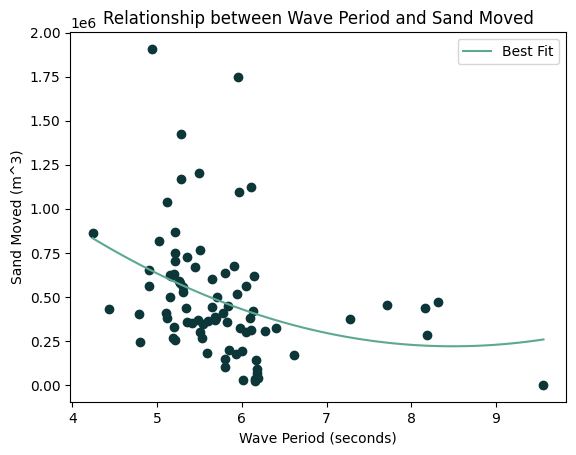

Final Equation: Height: quadratic_equation(x, -4958842.710438842, 7157899.521303141, -1927102.541816729)
R-squared Value: 0.10779395510145018


/var/folders/t3/pxhq_99963db4lj7rxmr4dyw0000gn/T/ipykernel_64616/2620246946.py:25: RuntimeWarning: overflow encountered in exp
  return a / (1 + np.exp(-b * (x - c)))


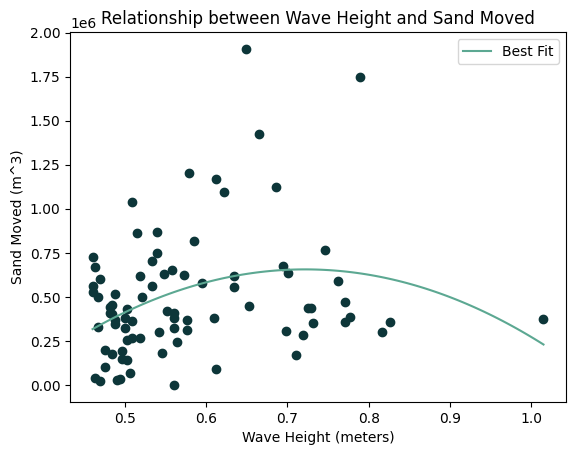

Final Equation: Energy: reciprocal_equation(x, 242854225.08097222, 379984.3286672502)
R-squared Value: 0.011899913987104438


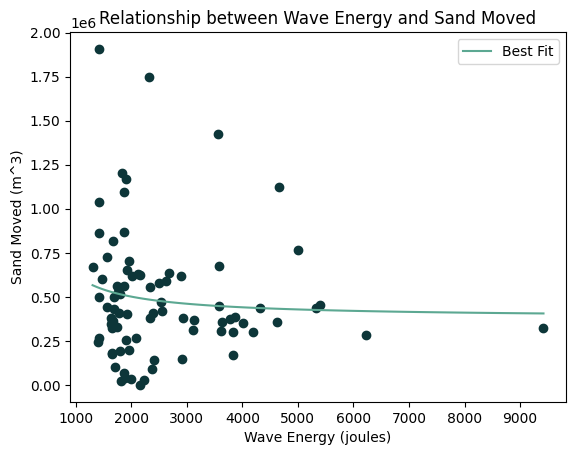

In [40]:
from scipy.optimize import curve_fit

x_dataPeriod = np.asarray(usableWavePeriod, dtype=float)
x_dataHeight = np.asarray(usableWaveHeight, dtype=float)
x_dataEnergy = np.asarray(waveEnergy, dtype=float)
y_data = np.asarray(usableTotalSandMoved, dtype=float)

# Define candidate equations
def linear_equation(x, a, b):
    return a * x + b

def exponential_equation(x, a, b):
    return a * np.exp(np.clip(b * x, -700, 700))

def logarithmic_equation(x, a, b):
    return a * np.log(x) + b

def quadratic_equation(x, a, b, c):
    return a * x**2 + b * x + c

def power_law_equation(x, a, b):
    return a * x**b

def sigmoidal_equation(x, a, b, c):
    return a / (1 + np.exp(-b * (x - c)))

def reciprocal_equation(x, a, b):
    return a / np.clip(x, 1e-10, None) + b

# List of candidate equations
candidate_equations = [linear_equation, exponential_equation, logarithmic_equation, quadratic_equation, power_law_equation, sigmoidal_equation, reciprocal_equation]

# Fit each equation and calculate R-squared with period
best_r_squared_period = 0
best_params_period = None
best_fit_function_period = None

for equation in candidate_equations:
    params, covariance = curve_fit(equation, x_dataPeriod, y_data)

    # Ensure positive parameters for reciprocal function
    if equation.__name__ == 'reciprocal_equation' and any(param <= 0 for param in params):
        continue

    y_fit = equation(x_dataPeriod, *params)

    # Calculate R-squared
    residuals = y_data - y_fit
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y_data - np.mean(y_data))**2)
    r_squared = 1 - (ss_res / ss_tot)

    # Update if R-squared is higher
    if r_squared > best_r_squared_period:
        best_r_squared_period = r_squared
        best_params_period = params
        best_fit_function_period = equation

# Print the final equation
equation_name_period = best_fit_function_period.__name__
fitted_parameters_period = best_params_period
final_equation_period = f"Period: {equation_name_period}(x, {', '.join(map(str, fitted_parameters_period))})"
print(f'Final Equation: {final_equation_period}')
print(f'R-squared Value: {best_r_squared_period}')

# Plot the data and best-fitting curve
plt.scatter(x_dataPeriod, y_data, color='#0D3639')
plt.ylabel('Sand Moved (m^3)')
plt.xlabel('Wave Period (seconds)')
x_range = np.linspace(min(x_dataPeriod), max(x_dataPeriod), 100)
plt.plot(x_range, best_fit_function_period(x_range, *best_params_period), label='Best Fit', color='#5CA892')
plt.legend()
plt.title('Relationship between Wave Period and Sand Moved')
plt.show()

# Fit each equation and calculate R-squared with period
best_r_squared_height = 0
best_params_height = None
best_fit_function_height = None

for equation in candidate_equations:
    params, covariance = curve_fit(equation, x_dataHeight, y_data)

    # Ensure positive parameters for reciprocal function
    if equation.__name__ == 'reciprocal_equation' and any(param <= 0 for param in params):
        continue

    y_fit = equation(x_dataHeight, *params)

    # Calculate R-squared
    residuals = y_data - y_fit
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y_data - np.mean(y_data))**2)
    r_squared = 1 - (ss_res / ss_tot)

    # Update if R-squared is higher
    if r_squared > best_r_squared_height:
        best_r_squared_height = r_squared
        best_params_height = params
        best_fit_function_height = equation

# Print the final equation
equation_name_height = best_fit_function_height.__name__
fitted_parameters_height = best_params_height
final_equation_height = f"Height: {equation_name_height}(x, {', '.join(map(str, fitted_parameters_height))})"
print(f'Final Equation: {final_equation_height}')
print(f'R-squared Value: {best_r_squared_height}')

# Plot the data and best-fitting curve
plt.scatter(x_dataHeight, y_data, color='#0D3639')
plt.ylabel('Sand Moved (m^3)')
plt.xlabel('Wave Height (meters)')
x_range = np.linspace(min(x_dataHeight), max(x_dataHeight), 100)
plt.plot(x_range, best_fit_function_height(x_range, *best_params_height), label='Best Fit', color='#5CA892')
plt.legend()
plt.title('Relationship between Wave Height and Sand Moved')
plt.show()

# Fit each equation and calculate R-squared with period
best_r_squared_energy = 0
best_params_energy = None
best_fit_function_energy = None

for equation in candidate_equations:
    params, covariance = curve_fit(equation, x_dataEnergy, y_data[:-1])

    # Ensure positive parameters for reciprocal function
    if equation.__name__ == 'reciprocal_equation' and any(param <= 0 for param in params):
        continue

    y_fit = equation(x_dataEnergy, *params)

    # Calculate R-squared
    residuals = y_data[:-1] - y_fit
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y_data[:-1] - np.mean(y_data))**2)
    r_squared = 1 - (ss_res / ss_tot)

    # Update if R-squared is higher
    if r_squared > best_r_squared_energy:
        best_r_squared_energy = r_squared
        best_params_energy = params
        best_fit_function_energy = equation

# Print the final equation
equation_name_energy = best_fit_function_energy.__name__
fitted_parameters_energy = best_params_energy
final_equation_energy = f"Energy: {equation_name_energy}(x, {', '.join(map(str, fitted_parameters_energy))})"
print(f'Final Equation: {final_equation_energy}')
print(f'R-squared Value: {best_r_squared_energy}')

# Plot the data and best-fitting curve
plt.scatter(x_dataEnergy, y_data[:-1], color='#0D3639')
plt.ylabel('Sand Moved (m^3)')
plt.xlabel('Wave Energy (joules)')
x_range = np.linspace(min(x_dataEnergy), max(x_dataEnergy), 100)
plt.plot(x_range, best_fit_function_energy(x_range, *best_params_energy), label='Best Fit', color='#5CA892')
plt.legend()
plt.title('Relationship between Wave Energy and Sand Moved')
plt.show()